## Observations and Insights 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
mouse_count = merge_data["Mouse ID"].nunique()
mouse_count

249

In [15]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
454,a203,Infubinol,Female,20,23,0,45.000000,0


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data.sort_values("Mouse ID").drop_duplicates(subset=["Mouse ID", "Timepoint"], )
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [4]:
# Check the number of mice in the clean DataFrame.
clean_count = clean_data["Mouse ID"].nunique()
clean_count


249

## Summary Statistics

In [5]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = round(clean_data["Tumor Volume (mm3)"].mean(), 2)
tumor_median = round(clean_data["Tumor Volume (mm3)"].median(), 2)
tumor_variance = round(clean_data["Tumor Volume (mm3)"].var(), 2)
tumor_std = round(clean_data["Tumor Volume (mm3)"].std(), 2)
tumor_sem = round(clean_data["Tumor Volume (mm3)"].sem(), 2)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_stats = pd.DataFrame({"Mean": [tumor_mean], 
                            "Median": [tumor_median],
                           "Variance": [tumor_variance],
                           "Standard Deviation": [tumor_std],
                           "Standard Error": [tumor_sem]})
tumor_stats


,Mean,Median,Variance,Standard Deviation,Standard Error
0,50.45,48.95,79.29,8.9,0.2


## Bar and Pie Charts

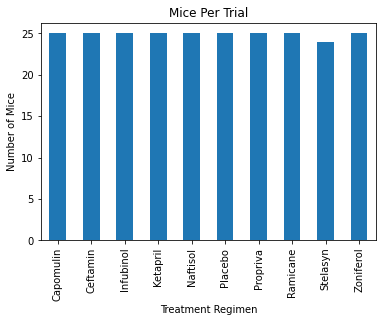

In [6]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

mice_regimen = clean_data[["Mouse ID", "Drug Regimen"]].drop_duplicates()
regimen_group = mice_regimen.groupby("Drug Regimen").count()["Mouse ID"]
regimen_group.plot(kind="bar")
plt.title("Mice Per Trial")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Mice")
plt.show()


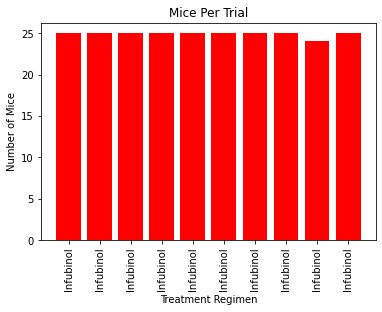

In [11]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

x_axis = np.arange(len(regimen_group))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, regimen_group, color='r')
plt.xticks(tick_locations, clean_data["Drug Regimen"], rotation="vertical")
plt.title("Mice Per Trial")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Mice")
plt.show()


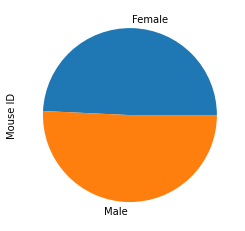

In [7]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
gender_data = clean_data[["Mouse ID", "Sex"]]
gender_group = gender_data.groupby("Sex").count()["Mouse ID"]

panda_pie = gender_group.plot.pie(subplots=True, figsize=(4, 4))
plt.title = "Breakdown by Gender"
plt.show()



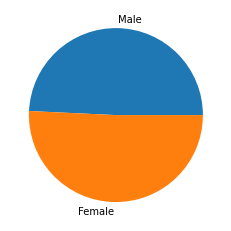

In [8]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
gender_labels = "Male", "Female"
pyplot_pie_plot = plt.pie(gender_group, labels=gender_labels)
plt.title = ("Breakdown by Gender")

plt.show()


## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
time_data = clean_data[["Mouse ID", "Timepoint"]]
last_tp = time_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data = pd.merge(clean_data, last_tp, on="Mouse ID")
clean_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,a203,Infubinol,Female,20,23,30,59.523197,1,45
1,a203,Infubinol,Female,20,23,35,61.931650,2,45
2,a203,Infubinol,Female,20,23,25,56.793208,1,45
3,a203,Infubinol,Female,20,23,20,55.173336,1,45
4,a203,Infubinol,Female,20,23,15,52.777870,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,20,57.898778,2,45
1884,z969,Naftisol,Male,9,30,25,63.145652,2,45
1885,z969,Naftisol,Male,9,30,30,65.841013,3,45
1886,z969,Naftisol,Male,9,30,35,69.176246,4,45


In [15]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Ramicane", "Stelasyn", "Zoniferol"]
drug_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
